In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [591]:
df_complete = pd.read_excel("/Users/salauddinali/Desktop/formatted_normalized_complete_data.xlsx")


In [592]:
df_goal1 = df_complete[["Reviewer_Name", "Restaurant_rating", "Reviewer_Age", "Contributions", "Helpful_votes","Photos"]]
df_goal1.head(2)
df_goal1.describe()
df_goal1.shape

(50637, 6)

,Total,Percent
Photos,22588,44.608579
Helpful_votes,4054,8.006162
Contributions,0,0.000000
Reviewer_Age,0,0.000000
Restaurant_rating,0,0.000000


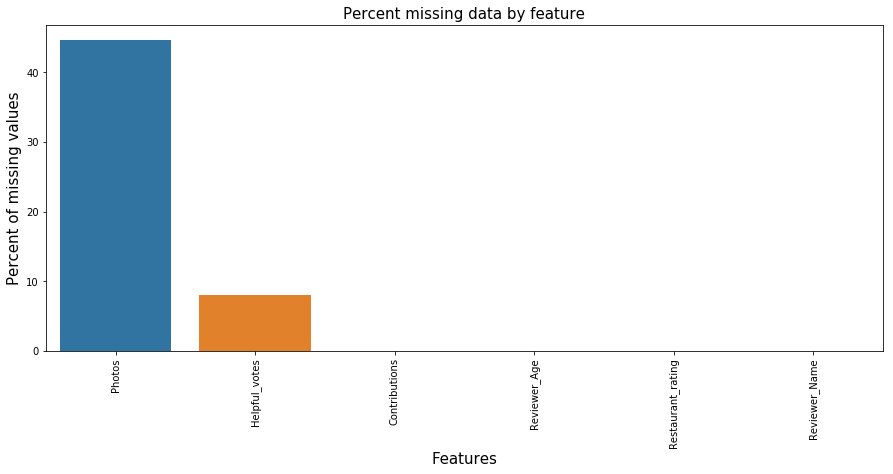

In [593]:
df_goal1= df_goal1.dropna(subset=["Reviewer_Name"])


#Finding missing values
import seaborn as sns
total = df_goal1.isnull().sum().sort_values(ascending=False)
percent = (df_goal1.isnull().sum()/df_goal1.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [594]:
df_complete["Reviewer_index"] = df_complete.index.values
df_complete.head(2)

#Dropping rows with Photos = 0 since we have a comprehensive dataset.
#df_complete = df_complete.dropna(subset=["Photos"])

,Restaurant_rating,Restaurant_name,Reviewer_Name,Reviewer_Level,Reviewer_Age,Reviewer_Location,Contributions,Visited_cities,Helpful_votes,Photos,Excellent,Very_good,Average,Poor,Terrible,Reviewer_index
0,3.5,"Fil's Diner, Ottawa",ADP,2,0,1,5,2.0,1.0,NaN,1.0,3.0,1.0,0.0,0.0,0
1,3.5,"Fil's Diner, Ottawa",Dbot,5,6,1,96,27.0,29.0,1.0,26.0,44.0,15.0,8.0,4.0,1


In [595]:
df_data = df_complete[["Contributions", "Reviewer_Age", "Helpful_votes", "Photos"]]

,Total,Percent
Photos,0,0.0
Helpful_votes,0,0.0
Reviewer_Age,0,0.0
Contributions,0,0.0


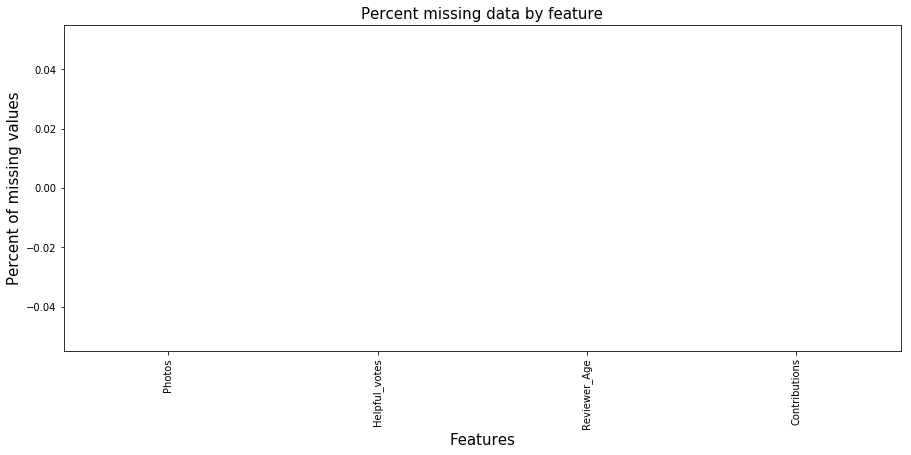

In [598]:

#Finding missing values
import seaborn as sns
total = df_data.isnull().sum().sort_values(ascending=False)
percent = (df_data.isnull().sum()/df_data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [597]:
#Filling empty values with mean
df_data = df_data.apply(lambda x: x.fillna(0),axis=0)
df_data.shape
#Filling NA with 0s 
#Filling empty values with mean
#df_data = df_data.apply(lambda x: x.fillna(x.),axis=0)

#Dropping na's in photos. 
#Filling empty values with mean


(50637, 4)

In [599]:
#Calculating z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_data))
print(z)

[[5.35350648e-01 2.24020168e+00 4.05864688e-01 1.62701915e-01]
 [5.32048805e-04 4.03530585e-01 1.65754279e-01 1.58621450e-01]
 [2.05576681e-01 1.01575428e+00 2.08631138e-01 1.54540985e-01]
 ...
 [4.06896971e-02 7.09642435e-01 1.91480395e-01 1.62701915e-01]
 [4.05796589e-01 1.32186613e+00 3.37261714e-01 1.62701915e-01]
 [4.64684798e-01 7.09642435e-01 3.62987830e-01 1.54540985e-01]]


In [600]:
#Removing values with z score greater than 3
df_data_clean = df_data[(z < 3).all(axis=1)]

In [601]:
print(df_data_clean.shape)
df_data_clean.head(2)


(49120, 4)


,Contributions,Reviewer_Age,Helpful_votes,Photos
0,5,0,1.0,0.0
1,96,6,29.0,1.0


Text(0.5,1,'After Cleaning: Photos')

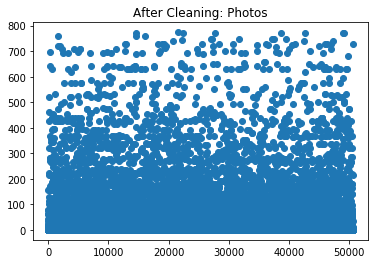

In [602]:
plt.scatter(df_data_clean.index.values, df_data_clean.Photos)
plt.title("After Cleaning: Photos")

Text(0.5,1,'After Cleaning: Helpful Votes')

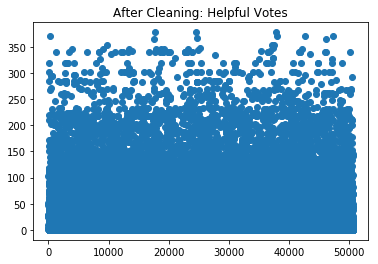

In [603]:
plt.scatter(df_data_clean.index.values, df_data_clean.Helpful_votes)
plt.title("After Cleaning: Helpful Votes")

Text(0.5,1,'After Cleaning: Contributions')

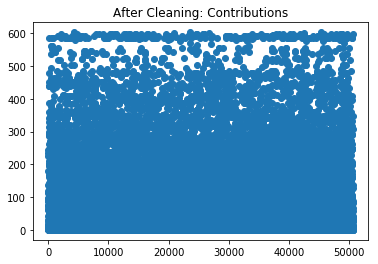

In [604]:
plt.scatter(df_data_clean.index.values, df_data_clean.Contributions)
plt.title("After Cleaning: Contributions")

In [516]:
plt.scatter(df_data_clean.index.values, df_data_clean.Visited_cities)
plt.title("After Cleaning: Visited Cities")

AttributeError: 'DataFrame' object has no attribute 'Visited_cities'

Text(0.5,1,'After Cleaning: Reviewer Age')

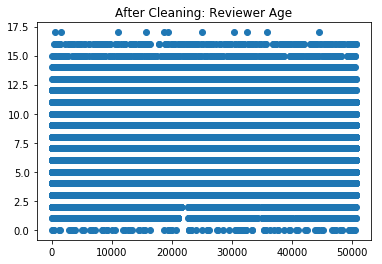

In [605]:
plt.scatter(df_data_clean.index.values, df_data_clean.Reviewer_Age)
plt.title("After Cleaning: Reviewer Age")

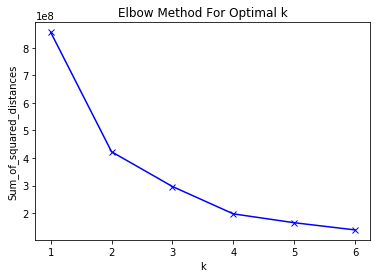

In [606]:
#Kmeans clustering elbow curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
K = range(1, 7)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_data_clean)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-', )
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [607]:
df_data_clean.describe()

,Contributions,Reviewer_Age,Helpful_votes,Photos
count,49120.000000,49120.000000,49120.000000,49120.000000
mean,75.880578,7.254906,35.208306,23.786014
std,100.382406,3.260176,47.801439,71.140680
min,1.000000,0.000000,0.000000,0.000000
25%,12.000000,5.000000,5.000000,0.000000
50%,37.000000,7.000000,17.000000,1.000000
75%,100.000000,10.000000,46.000000,13.000000
max,602.000000,17.000000,378.000000,774.000000


(array([30849.,  8479.,  4357.,  2001.,  1163.,   758.,   547.,   476.,
          161.,   329.]),
 array([  1. ,  61.1, 121.2, 181.3, 241.4, 301.5, 361.6, 421.7, 481.8,
        541.9, 602. ]),
 <a list of 10 Patch objects>)

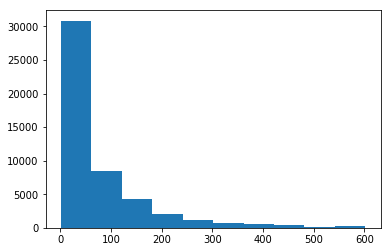

In [608]:
plt.hist(df_data_clean.Contributions)

(array([34322.,  8021.,  3381.,  1626.,   676.,   598.,   230.,   167.,
           38.,    61.]),
 array([  0. ,  37.8,  75.6, 113.4, 151.2, 189. , 226.8, 264.6, 302.4,
        340.2, 378. ]),
 <a list of 10 Patch objects>)

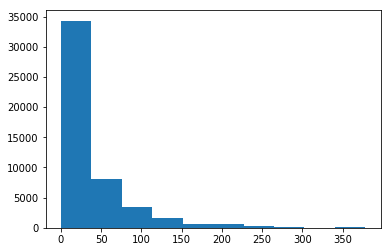

In [609]:
plt.hist(df_data_clean.Helpful_votes)

(array([45368.,  1820.,   757.,   370.,   277.,   223.,   101.,    59.,
           81.,    64.]),
 array([  0. ,  77.4, 154.8, 232.2, 309.6, 387. , 464.4, 541.8, 619.2,
        696.6, 774. ]),
 <a list of 10 Patch objects>)

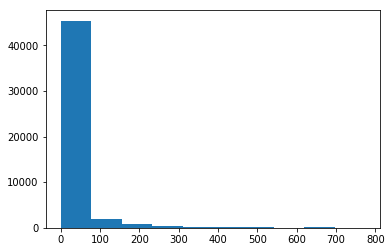

In [610]:
plt.hist(df_data_clean.Photos)

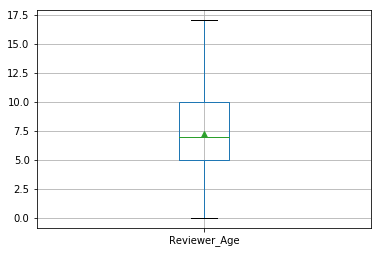

In [611]:
df_data_clean.boxplot(column='Reviewer_Age',showmeans=True)

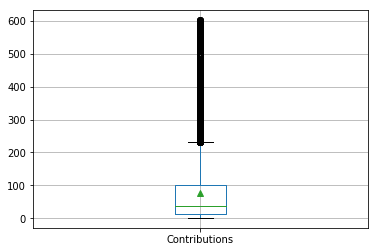

In [612]:
df_data_clean.boxplot(column="Contributions",showmeans=True)

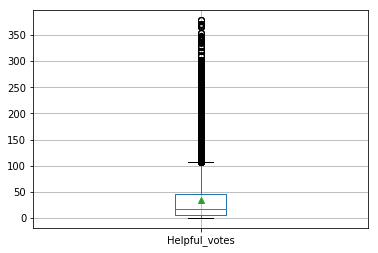

In [613]:
df_data_clean.boxplot(column="Helpful_votes", showmeans=True)

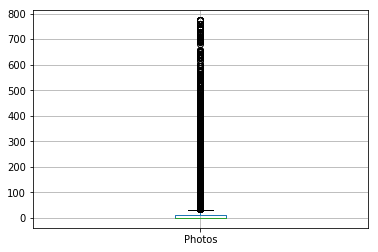

In [614]:
df_data_clean.boxplot(column="Photos")

In [615]:
from scipy.stats import kurtosis
from scipy.stats import skew
df_data_clean.head(2)

,Contributions,Reviewer_Age,Helpful_votes,Photos
0,5,0,1.0,0.0
1,96,6,29.0,1.0


In [616]:
kurtosis(df_data_clean)

array([ 6.74271849, -0.59907436,  8.43061071, 36.76238023])

In [617]:
skew(df_data_clean)

array([2.41713378, 0.19720765, 2.58043475, 5.49306254])

In [618]:
Q1 = df_data_clean.quantile(0.25)
Q3 = df_data_clean.quantile(0.75)
IQR = Q3 - Q1
df_data_clean = df_data_clean[~((df_data_clean < (Q1 - 1.5 * IQR)) |(df_data_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

In [619]:
df_data_clean.shape

(38999, 4)

In [620]:
kurtosis(df_data_clean)

array([ 2.15057381, -0.55571758,  1.96379848,  4.20230745])

In [621]:
skew(df_data_clean)

array([1.59463954, 0.25172247, 1.54146012, 2.17977023])

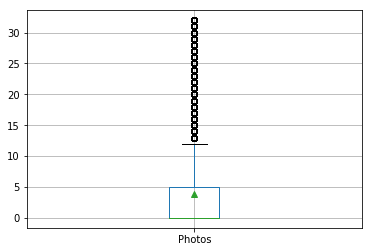

In [622]:
df_data_clean.boxplot(column="Photos", showmeans=True)

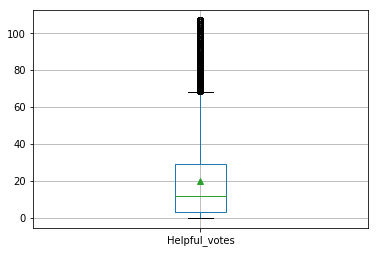

In [623]:
df_data_clean.boxplot(column="Helpful_votes", showmeans=True)

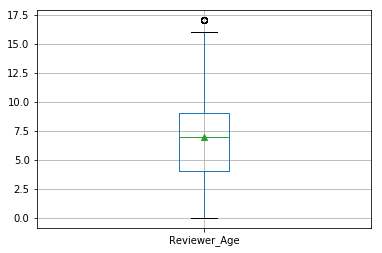

In [624]:
df_data_clean.boxplot(column='Reviewer_Age',showmeans=True)

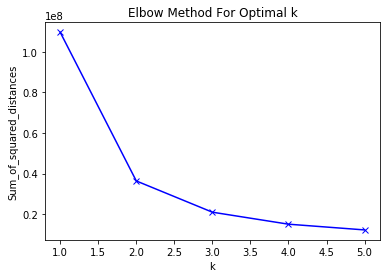

In [625]:
#Kmeans clustering elbow curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
K = range(1, 6)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_data_clean)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-', )
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0.5,1,'Helpful_votes post outliers')

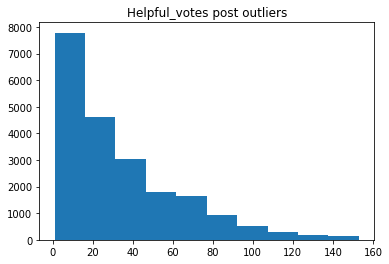

In [40]:
plt.hist(df_data_clean.Helpful_votes, bins=10)
plt.title("Helpful_votes post outliers")

Text(0.5,1,'Photos post outliers')

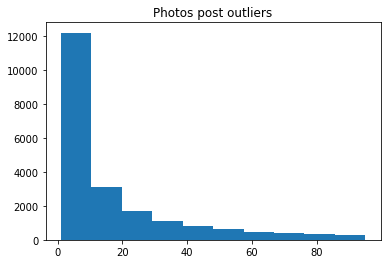

In [41]:
plt.hist(df_data_clean.Photos)
plt.title("Photos post outliers")

Text(0.5,1,'Contributions post outliers')

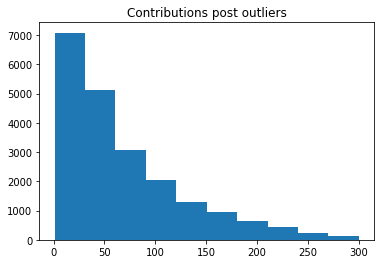

In [42]:
plt.hist(df_data_clean.Contributions)
plt.title("Contributions post outliers")

Text(0.5,1,'Reviewer Age post outliers')

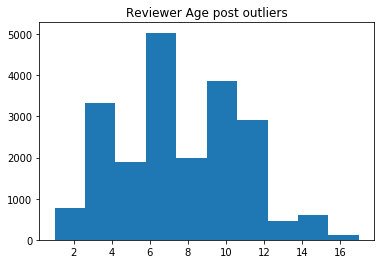

In [43]:
plt.hist(df_data_clean.Reviewer_Age)
plt.title("Reviewer Age post outliers")

Text(0.5,1,'Vistited Cities post outliers')

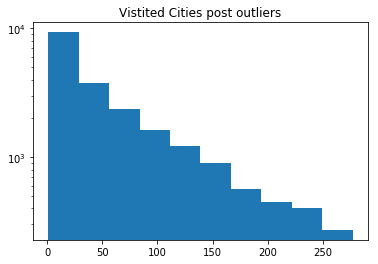

In [44]:
plt.hist(df_data_clean.Visited_cities, log=True)
plt.title("Vistited Cities post outliers")

In [45]:
df_data_clean.describe()

,Contributions,Reviewer_Age,Visited_cities,Helpful_votes,Photos,Reviewer_index
count,20961.000000,20961.000000,20961.000000,20961.000000,20961.000000,20961.000000
mean,67.940127,7.529269,59.558807,33.563837,16.485330,25350.172845
std,60.239720,3.153835,61.933461,29.905632,20.545766,14616.577367
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,5.000000,13.000000,11.000000,3.000000,12675.000000
50%,49.000000,7.000000,35.000000,24.000000,8.000000,25258.000000
75%,96.000000,10.000000,87.000000,49.000000,21.000000,38090.000000
max,300.000000,17.000000,277.000000,153.000000,95.000000,50636.000000


Text(0.5,1,'Vistited Cities post outliers')

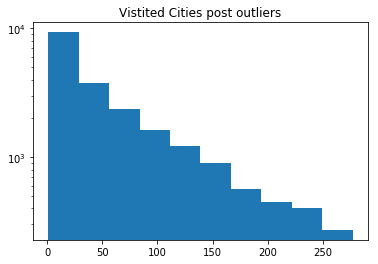

In [46]:
plt.hist(df_data_clean.Visited_cities ,log=True)
plt.title("Vistited Cities post outliers")

Text(0.5,1,'Visited Cities')

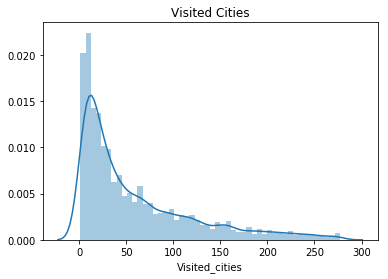

In [47]:
sns.distplot(df_data_clean.Visited_cities)
plt.title("Visited Cities")

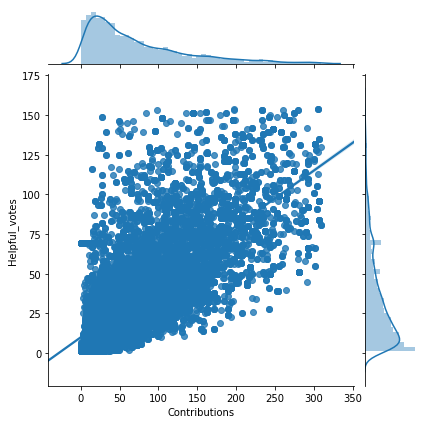

In [292]:
sns.jointplot(x="Contributions",y="Helpful_votes", data=df_data_clean, kind="reg")

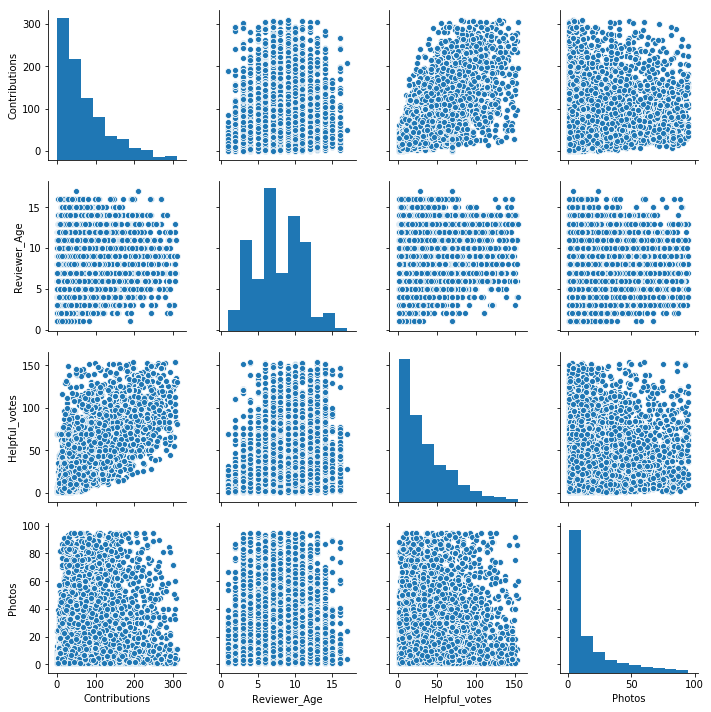

In [293]:
sns.pairplot(df_data_clean)

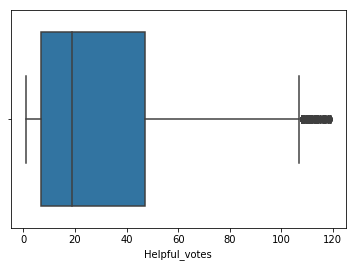

In [537]:
sns.boxplot(df_data_clean.Helpful_votes)

In [538]:
sns.boxplot(df_data_clean.Visited_cities)

AttributeError: 'DataFrame' object has no attribute 'Visited_cities'

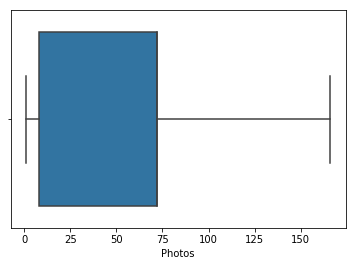

In [539]:
sns.boxplot(df_data_clean.Photos)

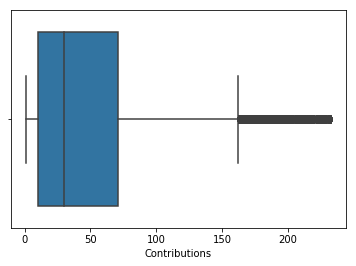

In [540]:
sns.boxplot(df_data_clean.Contributions)

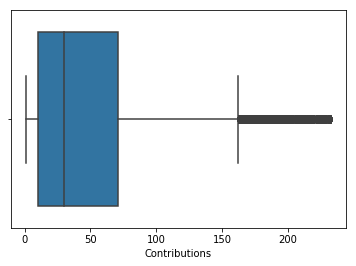

In [541]:
sns.boxplot(df_data_clean.Contributions)

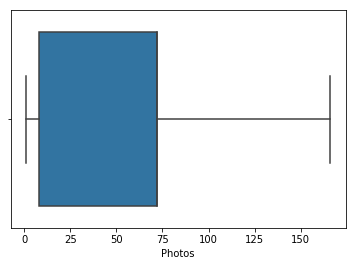

In [542]:
sns.boxplot(df_data_clean.Photos)

In [543]:
sns.boxplot(df_data_clean.Visited_cities)

AttributeError: 'DataFrame' object has no attribute 'Visited_cities'

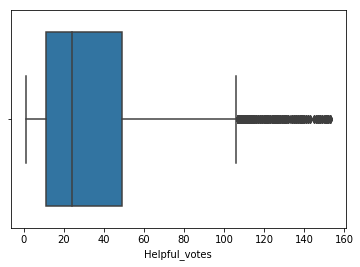

In [135]:
sns.boxplot(df_data_clean.Helpful_votes)

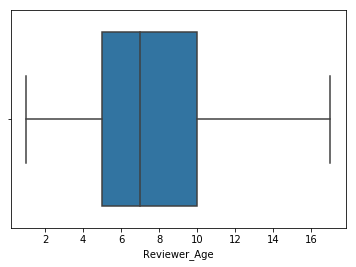

In [137]:
sns.boxplot(df_data_clean.Reviewer_Age)

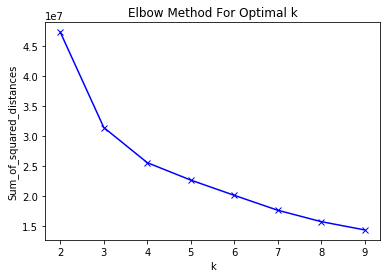

In [433]:
#Kmeans clustering elbow curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
K = range(2, 10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_data_clean[["Helpful_votes", "Contributions", "Photos", "Reviewer_Age"]])
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-', )
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [544]:
df_data_clean.corr()

,Contributions,Reviewer_Age,Helpful_votes,Photos
Contributions,1.000000,0.286517,0.623612,-0.112253
Reviewer_Age,0.286517,1.000000,0.245767,-0.110462
Helpful_votes,0.623612,0.245767,1.000000,-0.017280
Photos,-0.112253,-0.110462,-0.017280,1.000000


In [478]:
Q1 = df_data_clean[df_data_clean.columns.difference(['Reviewer_index'])].quantile(0.25)
Q3 = df_data_clean[df_data_clean.columns.difference(['Reviewer_index'])].quantile(0.75)
IQR = Q3 - Q1

print (IQR)

Contributions    112.000000
Helpful_votes     56.448784
Photos            37.000000
Reviewer_Age       5.000000
dtype: float64


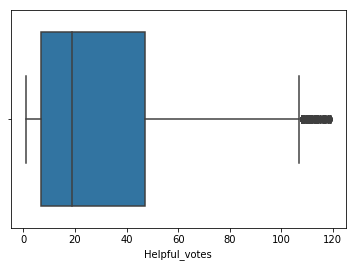

In [545]:
sns.boxplot(df_data_clean.Helpful_votes)

In [626]:
#Removing outlier example
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = 0.20
    high = 0.80
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df
df_new = remove_outlier(df_data_clean)

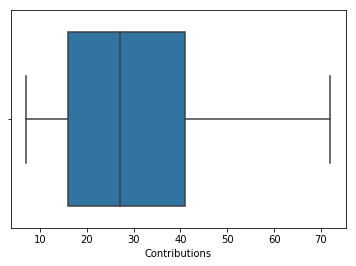

In [627]:
sns.boxplot(df_new.Contributions)

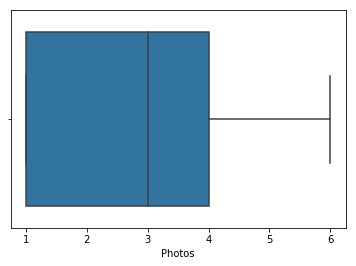

In [628]:
sns.boxplot(df_new.Photos)

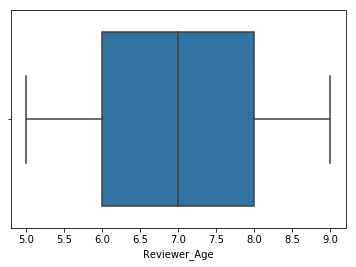

In [629]:
sns.boxplot(df_new.Reviewer_Age)

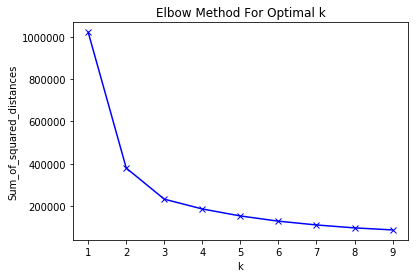

In [630]:
#Kmeans clustering elbow curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
K = range(1, 10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_new)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-', )
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [580]:
df_new.corr()

,Contributions,Reviewer_Age,Helpful_votes,Photos
Contributions,1.000000,0.072911,0.515088,0.232440
Reviewer_Age,0.072911,1.000000,0.212474,0.001784
Helpful_votes,0.515088,0.212474,1.000000,0.145851
Photos,0.232440,0.001784,0.145851,1.000000


In [360]:
df_new.head(5)

,Contributions,Reviewer_Age,Helpful_votes,Photos
18,73,7,12.0,25.0
19,44,8,23.0,8.0
21,32,7,29.0,13.0
28,88,6,43.0,4.0
36,40,9,34.0,18.0


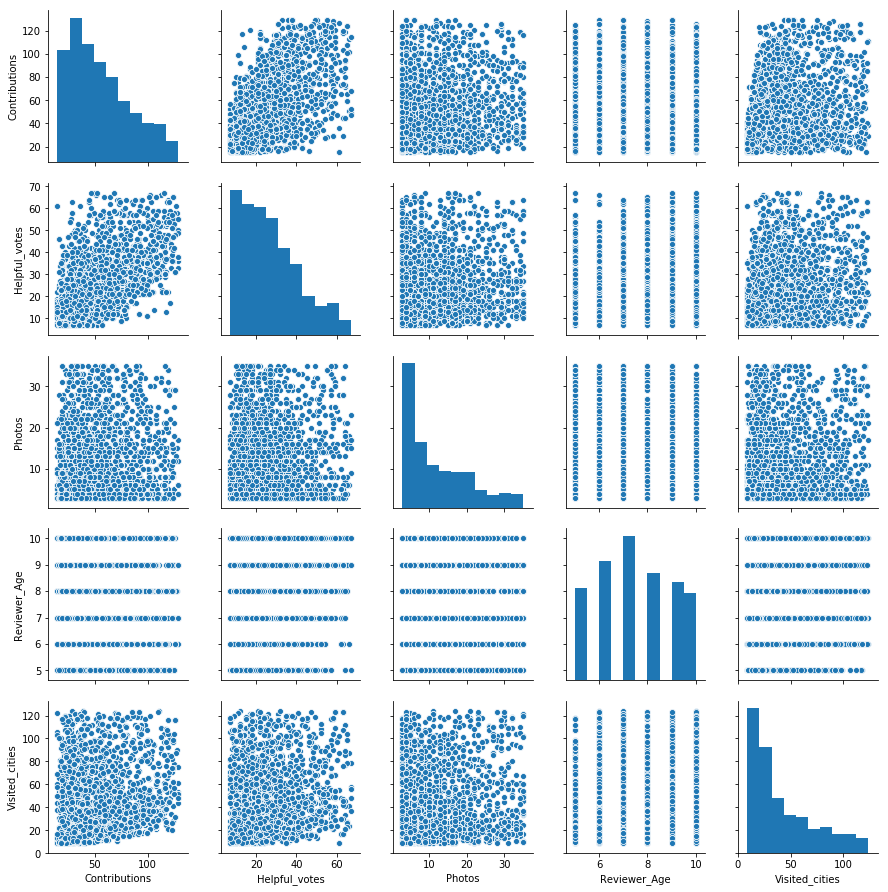

In [245]:
sns.pairplot(df_new)

In [633]:
#Clustering with k = 3
cluster_kmeans = KMeans(n_clusters=2)
goal1_clus = cluster_kmeans.fit(df_new)

In [588]:
df_new["Cluster_label"] = list(goal1_clus.labels_)

In [567]:
kurtosis(df_new)

array([-1.04960995, -1.2410139 , -0.10895941,  1.01506038, -0.93261729])

In [568]:
skew(df_new)

array([ 0.02324842, -0.0911117 ,  0.82213878,  1.3257413 ,  0.30704135])

In [569]:
df_new.to_excel("/Users/salauddinali/Desktop/goal_new1.xlsx")

In [570]:
rev_indexes = (df_new.index.values)
df_new.shape

(1583, 5)

In [571]:
temp_df = df_complete.loc[rev_indexes]

In [572]:
temp_df["Reviewer_Name"].to_excel("/Users/salauddinali/Desktop/goal_new1_reviewer_name.xlsx")

In [573]:
from sklearn.metrics import silhouette_score

In [634]:
silhouette_score(df_new, list(goal1_clus.labels_))

0.5264464226763842